In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 16.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, LeakyReLU, Activation

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.models import load_model
from keras.layers import LeakyReLU

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 13s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 1), (10000, 1))

In [6]:
# Convert class vectors to binary class matrices. This is called one hot encoding.
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
print(y_train.shape, y_val.shape)

(40000, 10) (10000, 10)


In [7]:
# Normalize the data. Before we need to convert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [8]:
# @tf.keras.utils.register_keras_serializable(package="my_package", name="custom_leaky_relu")
def custom_leaky_relu(x):
    return LeakyReLU(0.1)(x)

model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation(custom_leaky_relu))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(custom_leaky_relu))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(custom_leaky_relu))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(custom_leaky_relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(custom_leaky_relu))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(custom_leaky_relu))

# Classification head
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation(custom_leaky_relu))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation(custom_leaky_relu))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0

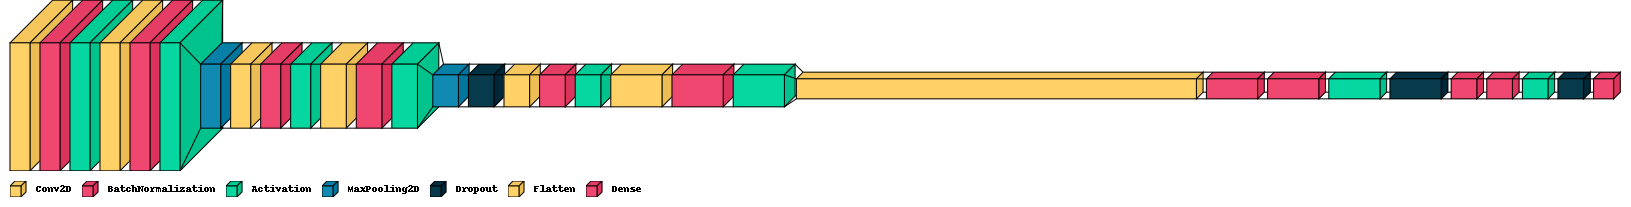

In [9]:
import visualkeras
from PIL import ImageFont

visualkeras.layered_view(model, legend=True)

In [10]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=100,
                    validation_data=(x_test, y_test))

Epoch 1/100
1250/1250 [==============================] - 37s 21ms/step - loss: 1.7867 - accuracy: 0.3954 - val_loss: 1.7009 - val_accuracy: 0.4814
Epoch 2/100
1250/1250 [==============================] - 27s 21ms/step - loss: 1.3536 - accuracy: 0.5275 - val_loss: 1.0923 - val_accuracy: 0.6307
Epoch 3/100
1250/1250 [==============================] - 26s 21ms/step - loss: 1.1676 - accuracy: 0.5931 - val_loss: 1.2992 - val_accuracy: 0.5844
Epoch 4/100
1250/1250 [==============================] - 26s 21ms/step - loss: 1.0536 - accuracy: 0.6316 - val_loss: 0.8172 - val_accuracy: 0.7131
Epoch 5/100
1250/1250 [==============================] - 26s 21ms/step - loss: 0.9791 - accuracy: 0.6599 - val_loss: 0.9272 - val_accuracy: 0.6861
Epoch 6/100
1250/1250 [==============================] - 26s 21ms/step - loss: 0.9119 - accuracy: 0.6819 - val_loss: 0.9174 - val_accuracy: 0.7045
Epoch 7/100
1250/1250 [==============================] - 26s 21ms/step - loss: 0.8511 - accuracy: 0.7041 - val_loss: 0

In [11]:
test_eval = model.evaluate(x_test, y_test, verbose=2)

print('Test loss: {:.2f}%'.format(test_eval[0]))
print('Test accuracy:{:.2f}%'.format(test_eval[1]))

313/313 - 2s - loss: 0.3552 - accuracy: 0.9010 - 2s/epoch - 5ms/step
Test loss: 0.36%
Test accuracy:0.90%


In [12]:
train_eval = model.evaluate(x_train, y_train, verbose=2)

print('Train loss:{:.2f}%'.format(train_eval[0]))
print('Train accuracy:{:.2f}%'.format(train_eval[1]))

1250/1250 - 6s - loss: 0.0418 - accuracy: 0.9858 - 6s/epoch - 5ms/step
Train loss:0.04%
Train accuracy:0.99%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


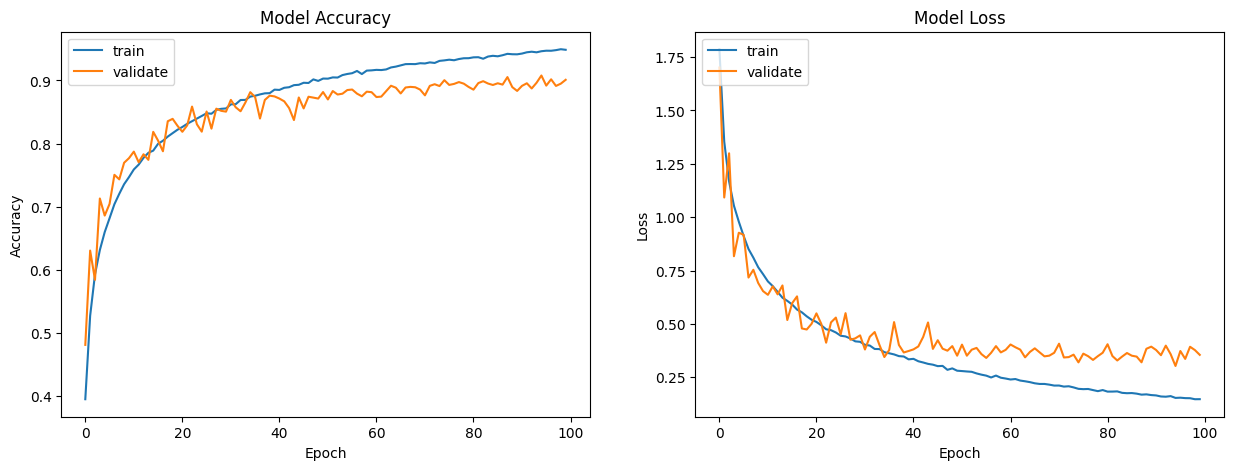

In [13]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [14]:
def plothist(hist):
    plt.rcParams["figure.figsize"] = (16, 8)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.grid()
    plt.show()

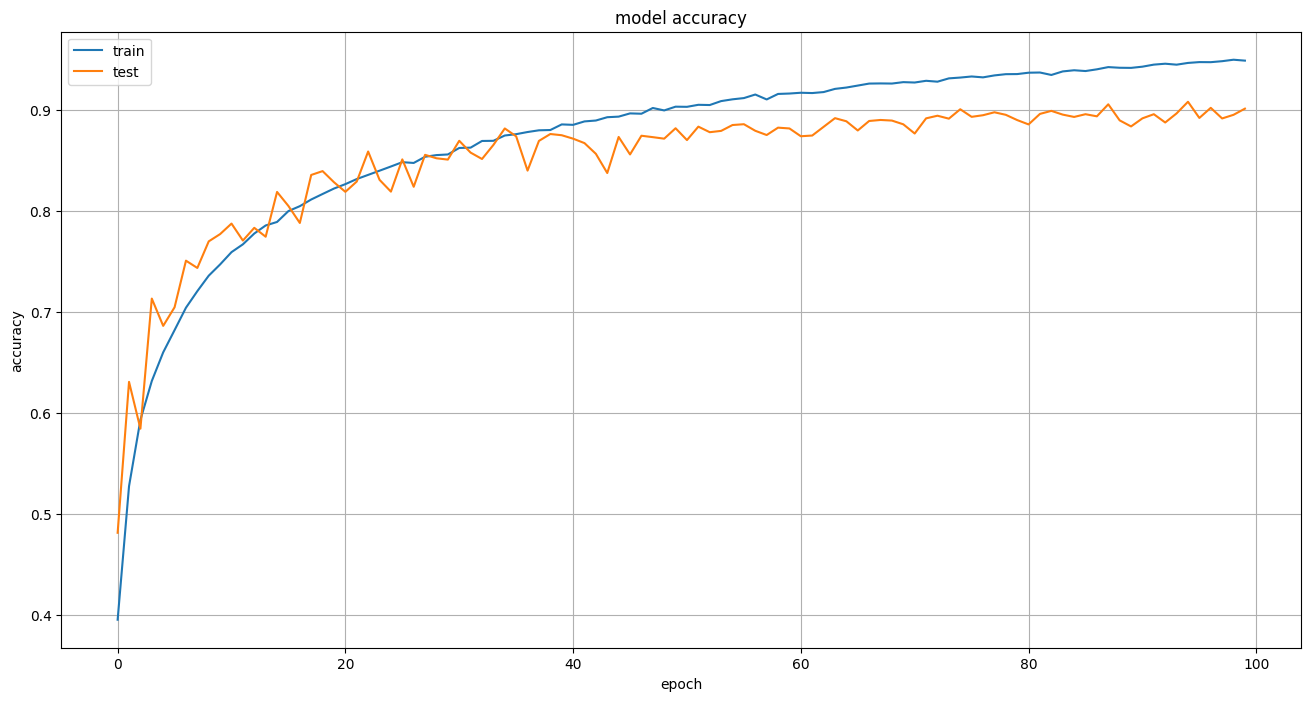

In [15]:
plothist(history)

In [16]:
def plothist_loss(hist):
    plt.rcParams["figure.figsize"] = (16, 8)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.grid()
    plt.show()

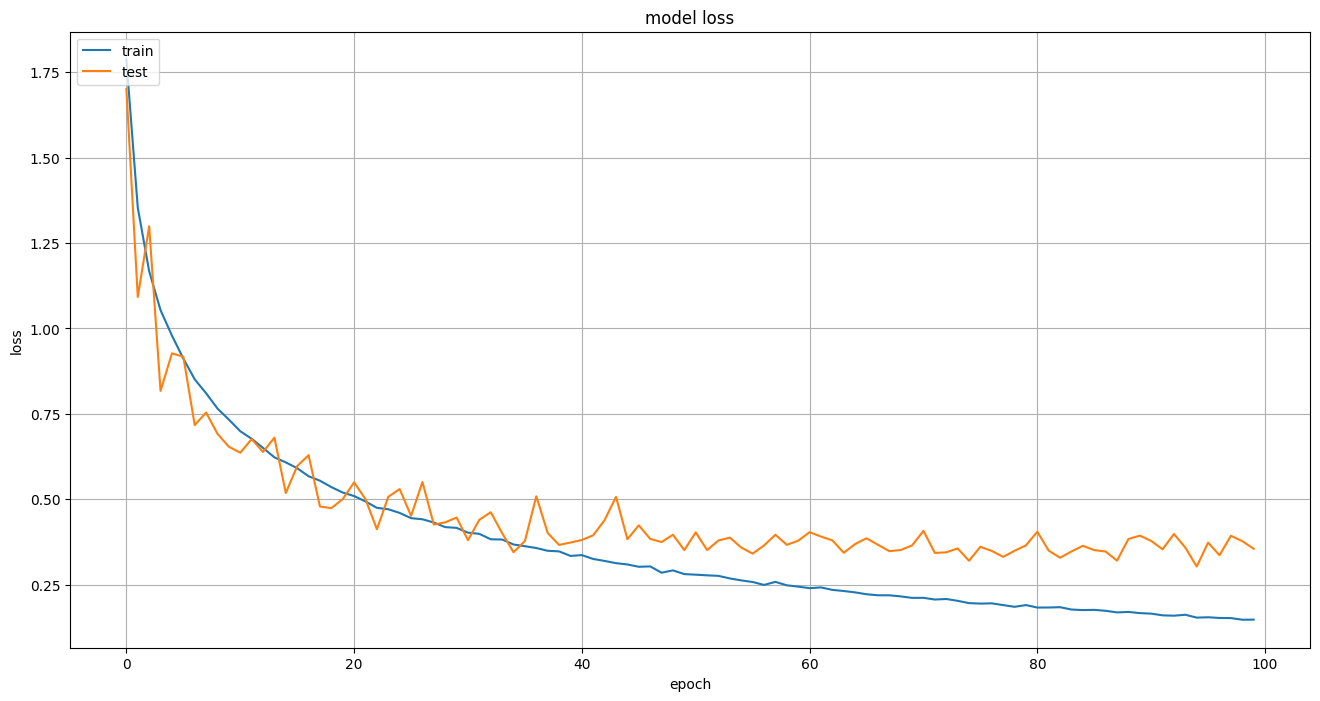

In [17]:
plothist_loss(history)

In [18]:
model.save('trained_model_updated.h5')

In [19]:
model.save_weights('trained_model_weights_updated.h5')

In [20]:
import pandas as pd

hist_df = pd.DataFrame(history.history)

# save to json:
hist_json_file = 'history_updated.json'
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv:
hist_csv_file = 'history_updated.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [37]:
#  Model Architecture

# The model is a Sequential Model consisting of a total of 5 Convolutional Layers and 4 Dense Layers.

# The first Convolutional Layer starts with 32 filters and uses a kernel size of 2x2.
# Subsequent Convolutional Layers double the number of filters and increment the kernel size by 1 at each layer.
# To prevent overfitting and reduce computational costs, Max Pooling Layers are introduced after some of the Convolutional Layers.

# After the last Convolutional Layer, the output is flattened and passed to the Dense Layers.

# The first Dense Layer contains 512 neurons, and the number of neurons is halved over the next two Dense Layers.
# Throughout the model, Dropout Layers are added to randomly ignore some neurons during training and mitigate overfitting.

# ReLU activation is used in all layers except for the output layer. ReLU helps introduce non-linearity and reduces the computation cost.

# The Output Layer has 2 neurons, one for each class in the classification task, and uses softmax activation to provide probability scores for each class.

# Overall, the architecture is designed to extract relevant features through convolutional layers, reduce dimensions through pooling, and make the final classification decision through dense layers and softmax activation. Dropout layers are incorporated to enhance the model's generalization ability and prevent overfitting.

Mounted at /content/drive
